In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'February 2019'

<h2>Основная таблица</h2>

In [7]:
rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2019 = rep_2018.tail(13)
rep_2019

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-02-28     2527   1625         44   7   0     3    121     130      16
2018-03-31     2568   1997         51   6   0    10     79     197      12
2018-04-30     2359   2410         74   5   0     1     56     129       9
2018-05-31     2166   2355         65   4   0     1     42     131      12
2018-06-30     2361   2369         32   3   0     7     64     150      17
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9
2018-10-31     2746   2665         77   2   0     7     86     166      12
2018-11-30     2914   2444         61   3   0     5    162     182      24
2018-12-31     2948   2292         72   4   0     4    116     211      11
2019-01-31     3234   2440        122   4   0     8    113     166       9
2019-02-28     2925   2222        142   8   0     4     96     179      29

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [8]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2019-02-28     -309   -218         20   4   0    -4    -17      13      20

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

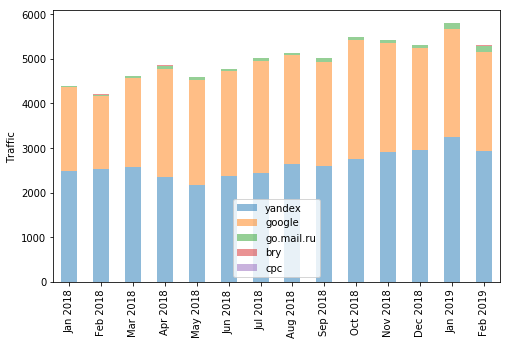

In [10]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2018.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2018.index]);

<h3>Линейная диаграмма изменений трафика</h3>

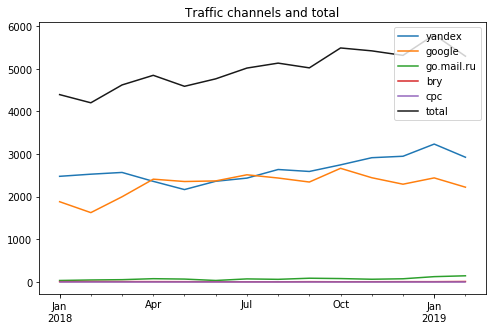

In [11]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2018.channels.plot(ax=ax);
rep_2018.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [12]:
kw = 'keyword visit'.split()

In [13]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
go.mail.ru 0                                             (not set)    142
google     0                                         дешевые двери    264
           1                                          двери дешево    227
           2                                       двери из дерева    138
           3                             np - /?cnt=catalog&r=1428     91
           4                             np - /?cnt=catalog&r=2438     78
           5                                      np - /?pid=pokaz     61
           6                                                np - /     48
           7                                         полотно двери     20
           8                                       недорогие двери     19
           9                                         двери продажа     18
           10                               дверные полотна купить     18
           11                                     двери с коробкой     16
           12                               дверное полотно дешево     11
           13                                       двери в ванную     10
           14                                    полотно для двери     10
           15                                      двери комнатные      6
           16                              np - /?pid=menu-katalog      5
           17                                      полотна дверные      5
           18                            np - /?cnt=catalog&r=1467      4
           19                             np - /?cnt=catalog&r=473      4
           20                            np - /?cnt=catalog&r=1462      3
           21                             np - /?cnt=catalog&r=379      3
           22                             np - /?cnt=catalog&r=597      3
           23                                      дверное полотно      3
           24                                    современные двери      3
           25                            np - /?cnt=catalog&r=1010      2
           26                             np - /?cnt=catalog&r=114      2
           27                            np - /?cnt=catalog&r=1452      2
           28                            np - /?cnt=catalog&r=2078      2
...                                                            ...    ...
yandex     1962  artens велдон мокко полотно дверное остеклнное...      1
           1963                      artens двери официальный сайт      1
           1964  artens двери полотно дверное глухое artens лео...      1
           1965  artens двери полотно дверное глухое artens лео...      1
           1966  artens двери полотно дверное глухое artens лео...      1
           1967                             artens дверное полотно      1
           1968  artens леона дуб натуральный дверь полотно две...      1
           1969  artens нолан 200х80 см полотно дверное глухое ...      1
           1970  artens нолан 200х80 см полотно дверное глухое ...      1
           1971  artens нолан 200х80 см полотно дверное глухое ...      1
           1972  artens нолан 200х80 см полотно дверное глухое ...      1
           1973  artens нолан 200х80 см полотно дверное глухое ...      1
           1974  artens нолан 200х80 см полотно дверное остеклн...      1
           1975  artens нолан 200х80 см полотно дверное остеклн...      1
           1976                      artens официальный сайт двери      1
           1977  artensдвери официальный сайт полотно дверное г...      1
           1978  artensдвери официальный сайт полотно дверное о...      1
           1979           assassins creed unity дверь с механизмом      1
           1980                  astrodoors двери официальный сайт      1
           1981  b сыграть беланициатнаным приставок 68 запиши ...      1
           1982                  belorawood двери официальный сайт      1
           1983                belwooddoors двери официальный сайт      1
           1984                  bluinterni двери официальный с

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [14]:
data.groupby(level=0, axis=0)[kw].apply(lambda x: x.xs(x.visit.idxmax())) #.xs(0, level=1)

,keyword,visit
go.mail.ru,(not set),142
google,дешевые двери,264
rambler,Дверное полотно купить,2
yandex,дверь гармошка,132


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [15]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
go.mail.ru 0                                    (not set)    142
google     0                                дешевые двери    264
           1                                 двери дешево    227
           2                              двери из дерева    138
           3                    np - /?cnt=catalog&r=1428     91
           4                    np - /?cnt=catalog&r=2438     78
rambler    0                       Дверное полотно купить      2
           1                                Двери тук тук      1
           2        Дверное полотно Прага глухое 800х2000      1
           3                дверное полотно темный анегри      1
           4  купить межкомнатные двери в москве недорого      1
yandex     5                               дверь гармошка    132
           6                               двери гармошка     82
           0                                    (not set)     79
           7                  дверь гармошка леруа мерлен     25
           8        двери гармошка в леруа мерлен каталог     23